# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [50]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_response = requests.get(city_url)
        city_weather = city_weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | magadan
Processing Record 3 of Set 1 | monticello
Processing Record 4 of Set 1 | lincheng
Processing Record 5 of Set 1 | lodeynoye pole
Processing Record 6 of Set 1 | saldanha
Processing Record 7 of Set 1 | qaqortoq
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | st. john's
Processing Record 11 of Set 1 | tsiombe
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | whitehorse
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | yeniseysk
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | thunder bay
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of Set 1 | praia da vitoria
P

Processing Record 36 of Set 4 | sao jose da coroa grande
Processing Record 37 of Set 4 | suining
Processing Record 38 of Set 4 | tasqala
Processing Record 39 of Set 4 | thames
Processing Record 40 of Set 4 | belmonte
Processing Record 41 of Set 4 | sao tome
Processing Record 42 of Set 4 | christchurch
Processing Record 43 of Set 4 | hilo
Processing Record 44 of Set 4 | santo antonio do ica
Processing Record 45 of Set 4 | hammerfest
Processing Record 46 of Set 4 | college
Processing Record 47 of Set 4 | susuman
Processing Record 48 of Set 4 | olyokminsk
Processing Record 49 of Set 4 | lynn haven
Processing Record 0 of Set 5 | chibougamau
Processing Record 1 of Set 5 | kargasok
Processing Record 2 of Set 5 | dudinka
Processing Record 3 of Set 5 | alice springs
Processing Record 4 of Set 5 | necocli
Processing Record 5 of Set 5 | east london
Processing Record 6 of Set 5 | tabriz
Processing Record 7 of Set 5 | cholapuram
Processing Record 8 of Set 5 | muynoq
Processing Record 9 of Set 5 | 

Processing Record 29 of Set 8 | akrehamn
Processing Record 30 of Set 8 | xilin hot
Processing Record 31 of Set 8 | nelspruit
Processing Record 32 of Set 8 | polyarnyy
Processing Record 33 of Set 8 | mehtar lam
Processing Record 34 of Set 8 | leua
Processing Record 35 of Set 8 | bel ombre
Processing Record 36 of Set 8 | tordesillas
Processing Record 37 of Set 8 | kalabo
Processing Record 38 of Set 8 | lensk
Processing Record 39 of Set 8 | arcachon
Processing Record 40 of Set 8 | badagara
Processing Record 41 of Set 8 | devinuwara
City not found. Skipping...
Processing Record 42 of Set 8 | gereida
Processing Record 43 of Set 8 | fushun
Processing Record 44 of Set 8 | gamba
Processing Record 45 of Set 8 | bikenibeu village
Processing Record 46 of Set 8 | kostroma
Processing Record 47 of Set 8 | tailai
Processing Record 48 of Set 8 | vrangel'
Processing Record 49 of Set 8 | gisborne
Processing Record 0 of Set 9 | port douglas
Processing Record 1 of Set 9 | moyale
Processing Record 2 of Set

Processing Record 18 of Set 12 | moapa valley
Processing Record 19 of Set 12 | bajina basta
Processing Record 20 of Set 12 | little cayman
City not found. Skipping...
Processing Record 21 of Set 12 | midvagur
Processing Record 22 of Set 12 | cururupu
Processing Record 23 of Set 12 | ugoofaaru
Processing Record 24 of Set 12 | ujae
Processing Record 25 of Set 12 | argo
Processing Record 26 of Set 12 | karakol
Processing Record 27 of Set 12 | port augusta
Processing Record 28 of Set 12 | ghazni
Processing Record 29 of Set 12 | catterick garrison
Processing Record 30 of Set 12 | moyobamba
Processing Record 31 of Set 12 | arfoud
Processing Record 32 of Set 12 | forster
Processing Record 33 of Set 12 | ilebo
Processing Record 34 of Set 12 | port-gentil
-----------------------------
Data Retrieval Complete      
-----------------------------


In [51]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [52]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,20.91,79,100,2.12,US,1689927113
1,magadan,59.5667,150.8000,23.63,76,17,4.04,RU,1689927114
2,monticello,45.3055,-93.7941,16.79,96,75,0.00,US,1689927114
3,lincheng,19.9078,109.6858,31.76,68,94,5.36,CN,1689927114
4,lodeynoye pole,60.7260,33.5531,17.65,66,100,5.61,RU,1689927114


In [53]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [54]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,20.91,79,100,2.12,US,1689927113
1,magadan,59.5667,150.8000,23.63,76,17,4.04,RU,1689927114
2,monticello,45.3055,-93.7941,16.79,96,75,0.00,US,1689927114
3,lincheng,19.9078,109.6858,31.76,68,94,5.36,CN,1689927114
4,lodeynoye pole,60.7260,33.5531,17.65,66,100,5.61,RU,1689927114


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

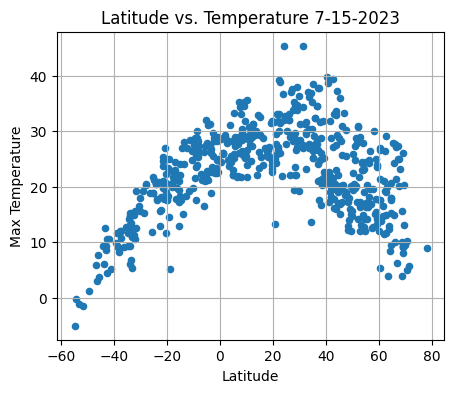

In [55]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(5,4))          


# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Latitude vs. Temperature 7-15-2023")

# Save the figure
plt.savefig("../output_data/Fig1.png")
#city_data_df = plt.savefig("C:/Users/jmced/Desktop/API_Challenge/python-api-challenge/WeatherPy/Starter_Code/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

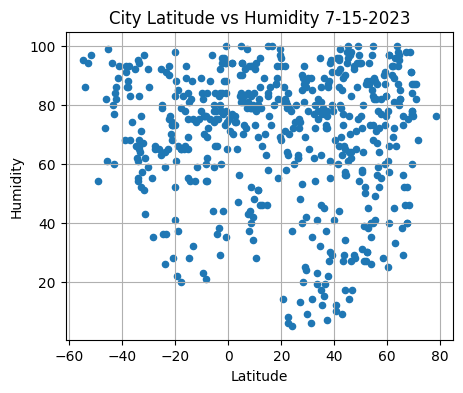

In [56]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(5,4)) 

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs Humidity 7-15-2023")


# Save the figure
plt.savefig("../output_data/Fig2.png")
#city_data_df = plt.savefig("C:/Users/jmced/Desktop/API_Challenge/python-api-challenge/WeatherPy/Starter_Code/output_data/Fig2.png")
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

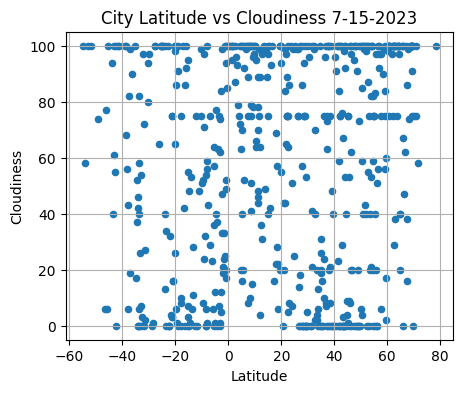

In [57]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(5,4)) 

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs Cloudiness 7-15-2023")


# Save the figure
plt.savefig("../output_data/Fig3.png")
#city_data_df = plt.savefig("C:/Users/jmced/Desktop/API_Challenge/python-api-challenge/WeatherPy/Starter_Code/output_data/Fig3.png")



# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

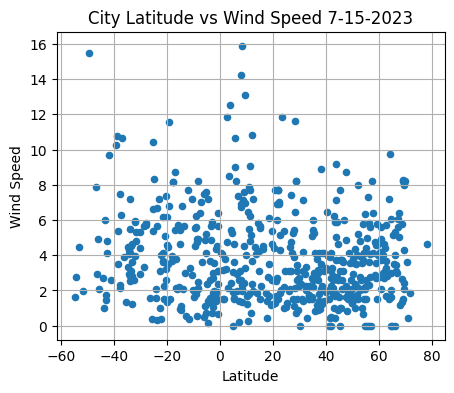

In [58]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(5,4)) 


# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs Wind Speed 7-15-2023")


# Save the figure
plt.savefig("../output_data/Fig4.png")
#city_data_df = plt.savefig("C:/Users/jmced/Desktop/API_Challenge/python-api-challenge/WeatherPy/Starter_Code/output_data/Fig4.png")
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [59]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [94]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def linear_regression(x, y, c):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    print(f"The r-value is: {(linregress(x, y)[2])}")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.xlabel('Latitude')
    plt.annotate(line_eq, c, fontsize=15,color="red")
    plt.plot(x, regress_values,"r-")

In [61]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,albany,42.6001,-73.9662,20.91,79,100,2.12,US,1689927113
1,magadan,59.5667,150.8000,23.63,76,17,4.04,RU,1689927114
2,monticello,45.3055,-93.7941,16.79,96,75,0.00,US,1689927114
3,lincheng,19.9078,109.6858,31.76,68,94,5.36,CN,1689927114
4,lodeynoye pole,60.7260,33.5531,17.65,66,100,5.61,RU,1689927114


In [62]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,saldanha,-33.0117,17.9442,11.01,52,54,3.63,ZA,1689927114
8,waitangi,-43.9535,-176.5597,9.34,94,94,2.68,NZ,1689927115
10,tsiombe,-25.3000,45.4833,18.92,63,100,6.62,MG,1689927115
13,edinburgh of the seven seas,-37.0676,-12.3116,12.04,68,19,10.67,SH,1689927116
15,port-aux-francais,-49.3500,70.2167,1.13,54,74,15.45,TF,1689927116


###  Temperature vs. Latitude Linear Regression Plot

In [63]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: -0.5676589469490122


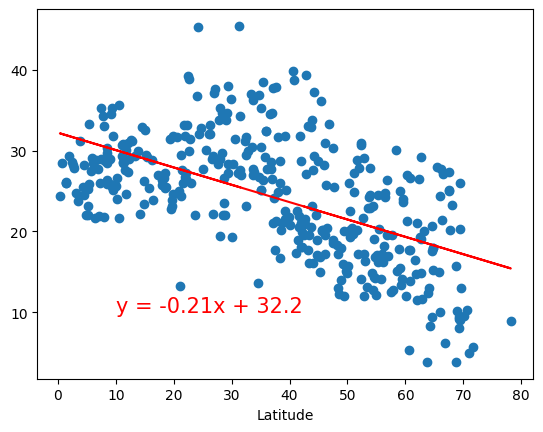

In [95]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],(10,10))

The r-value is: 0.8683600101236798


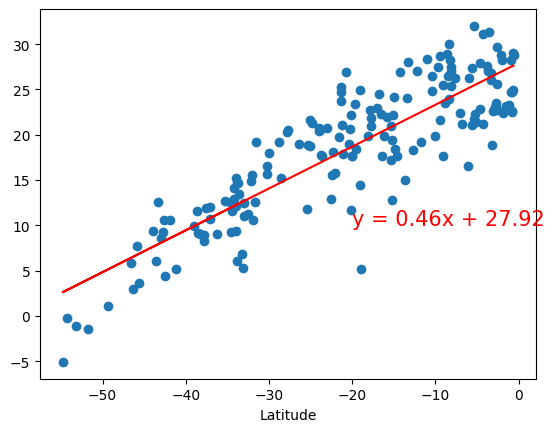

In [100]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],(-20,10))

**Discussion about the linear relationship:** From these graphs you can see that there is a correlation between the relationship of temperature and latitude. In both the Northern and Southern hemisphere graphs you can see that as the latitude gets closer to the equator, which is 0, the max temperature raises.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.03305529218537581


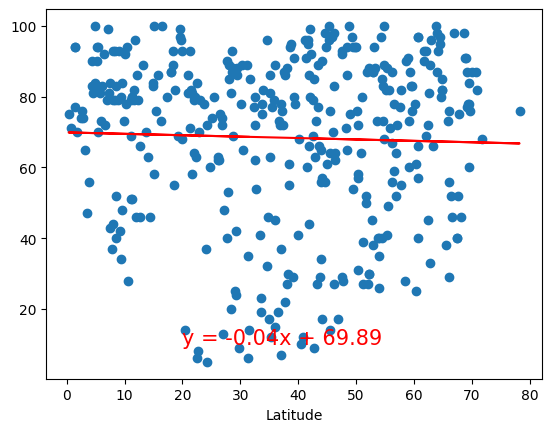

In [101]:
# Northern Hemisphere
# YOUR CODE HERE
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],(20,10))

The r-value is: -0.10949919572971634


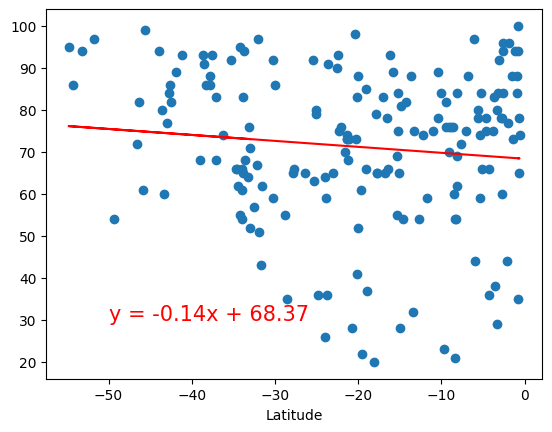

In [103]:
# Southern Hemisphere
# YOUR CODE HERE
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],(-50,30))

**Discussion about the linear relationship:** The r-value in the humidity vs latitude plots are close to 0, therefore, the relationship between humidity and latitude is not closely correlated. The plots of both graphs are scattered everywhere without a tight relationship to the linear regression line.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.003532465096758708


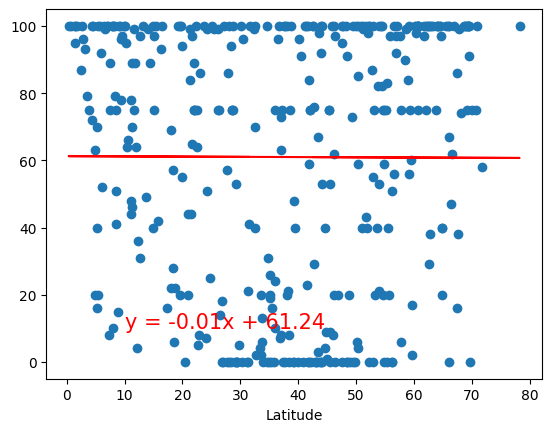

In [104]:
# Northern Hemisphere
# YOUR CODE HERE
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],(10,10))

The r-value is: -0.18232765848106305


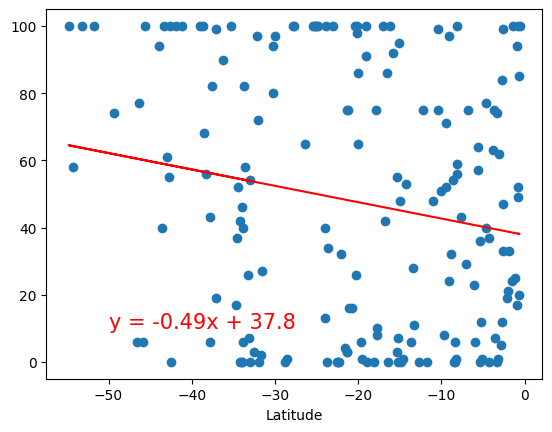

In [105]:
# Southern Hemisphere
# YOUR CODE HERE
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],(-50,10))

**Discussion about the linear relationship:** The r-value in the cloudiness vs latitude plots are close to 0, therefore, the relationship between cloudiness and latitude is not closely correlated. The plots of both graphs are scattered everywhere without a tight relationship to the linear regression line. Anywhere in the world can be cloudy or just have clear skies.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.13616890209176205


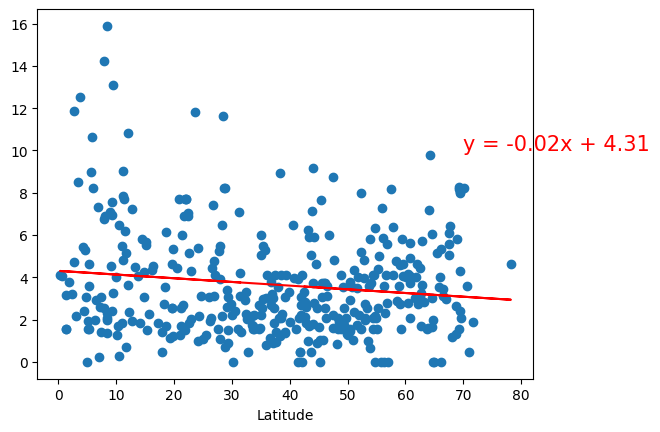

In [107]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],(70,10))

The r-value is: -0.1875549064605556


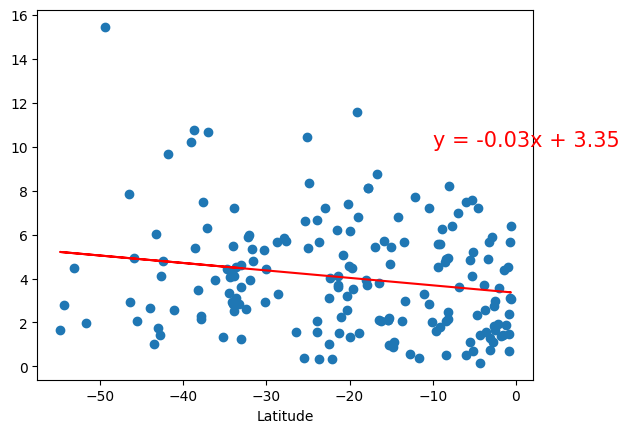

In [108]:
# Southern Hemisphere
# YOUR CODE HERE
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],(-10,10))

**Discussion about the linear relationship:** The r-value of every relationship is all very close to 0, therefore the relationship isn't strongly correlated between wind speed and latitude with the linear regression line. However based off the graphs you can see in the southern hempishere as it gets closer to 0, generally speaking, the wind speeds reduce and get lower as well.
